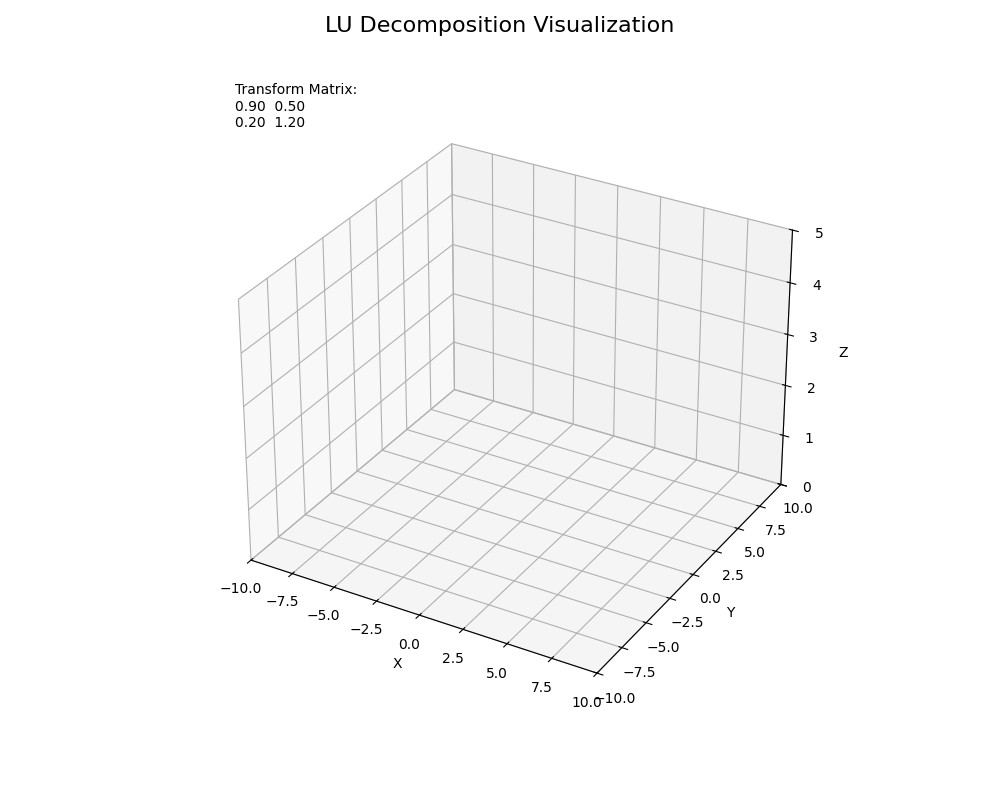

In [1]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy import linalg


plu_plots = []

matrix = np.array(
    [
        [0.9, 0.5],
        [0.2, 1.2],
    ]
)


# 設定
n = 11  # 行列のサイズ
frames = 4  # アニメーションフレーム数
interval = 1000  # フレーム間隔（ミリ秒）

# nxnの2次元行列を作成
points = []
for i in range(n):
    for j in range(n):
        points.append([i - 5, j - 5])
points = np.array(points)

# LU分解
P, L, U = linalg.lu(matrix)

# プロット設定
fig = plt.figure(figsize=(10, 8))
fig.suptitle("LU Decomposition Visualization", fontsize=16)

ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.grid(True)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(0, 5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# テキスト表示用
text_matrix = ax.text2D(0.05, 0.95, "", transform=ax.transAxes)
text_P = ax.text2D(0.05, 0.90, "", transform=ax.transAxes)
text_L = ax.text2D(0.05, 0.85, "", transform=ax.transAxes)
text_U = ax.text2D(0.05, 0.80, "", transform=ax.transAxes)

# 変換行列のテキストを更新（これは変わらない固定値）
matrix_text = f"Transform Matrix:\n{matrix[0,0]:.2f}  {matrix[0,1]:.2f}\n{matrix[1,0]:.2f}  {matrix[1,1]:.2f}"
text_matrix.set_text(matrix_text)


# アニメーション更新関数
def update(frame):
    global plu_plots

    if frame == 0:
        for plu_plot in plu_plots:
            plu_plot.remove()
        plu_plots.clear()

    transformed = points

    if frame == 1:
        transformed = np.dot(points, P.T)
    if frame == 2:
        transformed = np.dot(np.dot(points, P.T), L.T)
    if frame == 3:
        transformed = np.dot(np.dot(np.dot(points, P.T), L.T), U.T)

    transformed_x = transformed[:, 0]
    transformed_y = transformed[:, 1]
    transformed_z = [frame] * len(transformed[:, 0])

    plot = ax.scatter(transformed_x, transformed_y, transformed_z, color="green")
    plu_plots.append(plot)

    # すべてのプロットオブジェクトを返す
    return tuple(plu_plots)


# アニメーションを作成
anim = FuncAnimation(fig, update, frames=frames, interval=interval, blit=True)

plt.show()
